<a href="https://colab.research.google.com/github/manisa504/ciss09/blob/main/Exercise3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd
import scipy.stats as ss
import statsmodels.api as sm
import math as mt
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [17]:
def premutation_function(dataframe, data_col, grouping_col, iterations, statistic_function):
  output = {}

  groups = dataframe[grouping_col].value_counts().index
  values = dataframe[grouping_col].value_counts()

  for x in range(iterations):
    for i in groups:
      sample_amount = dataframe[grouping_col].value_counts()[i]
      sample_data = dataframe[data_col].sample(sample_amount, replace=False).to_list()
      sample_metric = statistic_function(sample_data)
      try:
          output[i].append(sample_metric)
      except(KeyError, AttributeError):
          output[i]=[sample_metric]

  final_output = pd.DataFrame(output)
  return final_output


In [7]:
from google.colab import files
uploaded = files.upload()

Saving ab_data.csv to ab_data.csv


In [13]:
ab_test_data_import = pd.read = pd.read_csv("ab_data.csv")
ab_test_data_import 

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [26]:
i = ab_test_data_import[
    (
        (ab_test_data_import["group"] == "treatment")
        == (ab_test_data_import["landing_page"] == "new_page")
    )
    == False
].index
df2 = ab_test_data_import.drop(i)
df2["group_landing_page"] = df2["group"] + df2["landing_page"]
df2

,user_id,timestamp,group,landing_page,converted,group_landing_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,controlold_page
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,controlold_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,treatmentnew_page
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,treatmentnew_page
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,controlold_page
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,controlold_page
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,controlold_page
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,controlold_page
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,controlold_page


In [28]:
permutation_data = premutation_function(df2, "converted", "group", 100, np.mean)
permutation_data

,treatment,control
0,0.119200,0.120145
1,0.119144,0.118810
2,0.119089,0.120290
3,0.120307,0.119760
4,0.119502,0.118307
...,...,...
95,0.119220,0.119388
96,0.119447,0.119746
97,0.118635,0.119567
98,0.119674,0.119299


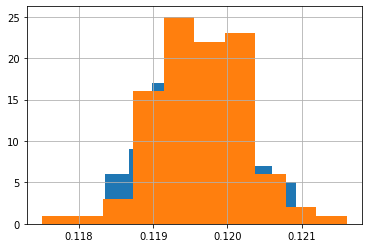

In [29]:
permutation_data["treatment"].hist()
permutation_data["control"].hist()

In [39]:
res = ss.ttest_ind(df2[df2["group"] == 'control']["converted"],
                  df2[df2["group"] == 'treatment']["converted"],
                  equal_var=False)

print(f'p-value for single sided test: {res.pvalue / 2:.4f}')

p-value for single sided test: 0.0948


Since the P-value is less than 0.05, we will have to reject null hypothesis and accept alternate hypothesis.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving click_rates.csv to click_rates.csv


In [11]:
four_sessions = pd.read_csv("click_rates.csv")
four_sessions

,Headline,Click,Rate
0,Headline A,Click,14
1,Headline A,No-click,986
2,Headline B,Click,8
3,Headline B,No-click,992
4,Headline C,Click,12
5,Headline C,No-click,988
